In [25]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [26]:
penguin = pd.read_csv('penguins.csv')
penguin[penguin['FlipperLength'].isnull()]
penguin

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [27]:
penguin.dropna(inplace = True)
penguin

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [28]:
features = ['CulmenLength' , 'CulmenDepth' , 'FlipperLength' , 'BodyMass']
target_1 = 'Species'

data , target = penguin[features] , penguin[target_1] 

In [29]:
penguin['Species'].value_counts()

0    151
1    123
2     68
Name: Species, dtype: int64

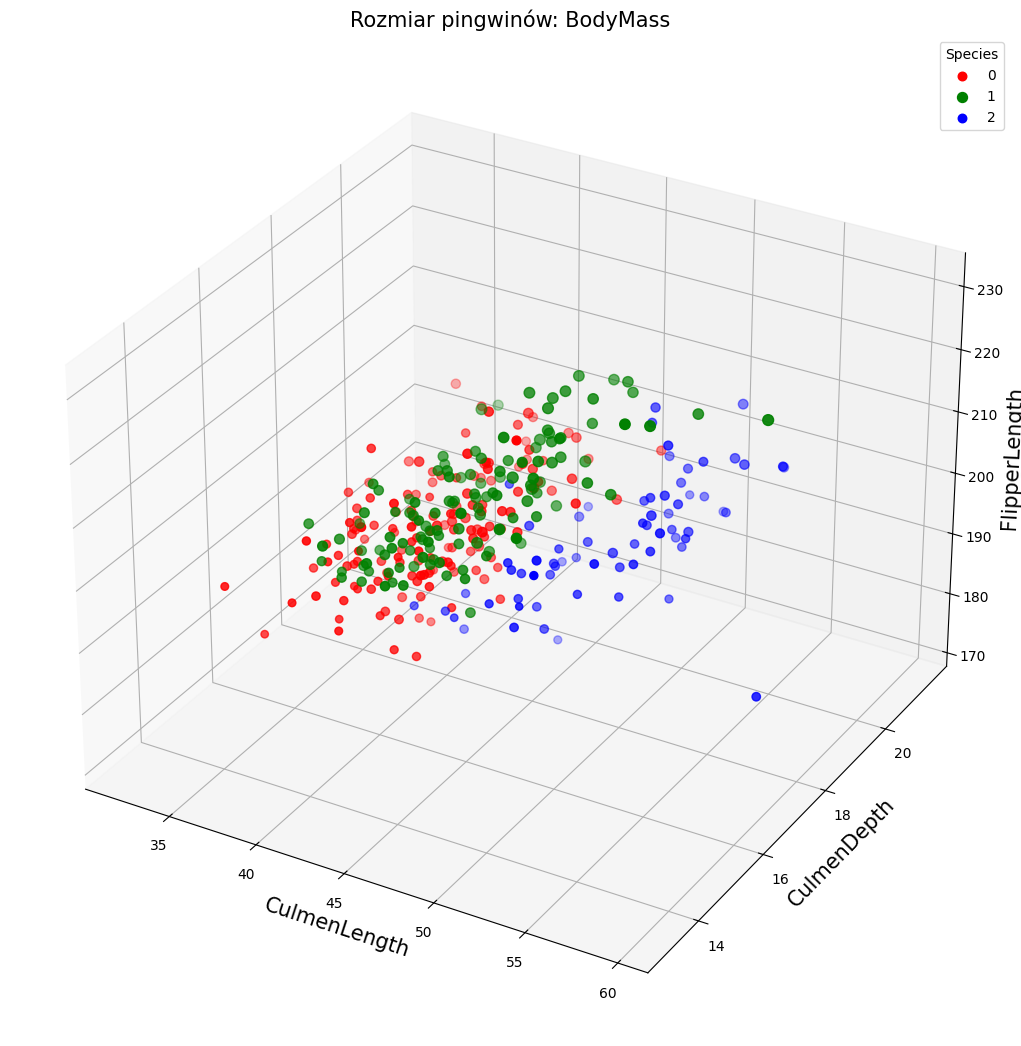

In [30]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=penguin.loc[penguin['Species']==0, 'CulmenLength'],
                 ys=penguin.loc[penguin['Species']==0,'CulmenDepth'],
                 zs=penguin.loc[penguin['Species']==0, 'FlipperLength'],
                 s=penguin.loc[penguin['Species']==0,'BodyMass']*0.01,
                 c='red', label='0')
img = ax.scatter(xs=penguin.loc[penguin['Species']==1, 'CulmenLength'],
                 ys=penguin.loc[penguin['Species']==1,'CulmenDepth'],
                 zs=penguin.loc[penguin['Species']==1, 'FlipperLength'],
                 s=penguin.loc[penguin['Species']==1,'BodyMass']*0.01,
                 c='green', label='1')
img = ax.scatter(xs=penguin.loc[penguin['Species']==2, 'CulmenLength'],
                 ys=penguin.loc[penguin['Species']==2,'CulmenDepth'],
                 zs=penguin.loc[penguin['Species']==2, 'FlipperLength'],
                 s=penguin.loc[penguin['Species']==2,'BodyMass']*0.01,
                 c='blue', label='2')
ax.set_xlabel(xlabel='CulmenLength', size=15)
ax.set_ylabel(ylabel='CulmenDepth', size=15)
ax.set_zlabel(zlabel='FlipperLength', size=15)
ax.set_title('Rozmiar pingwinów: BodyMass', size=15)
plt.legend(title='Species')
plt.show()

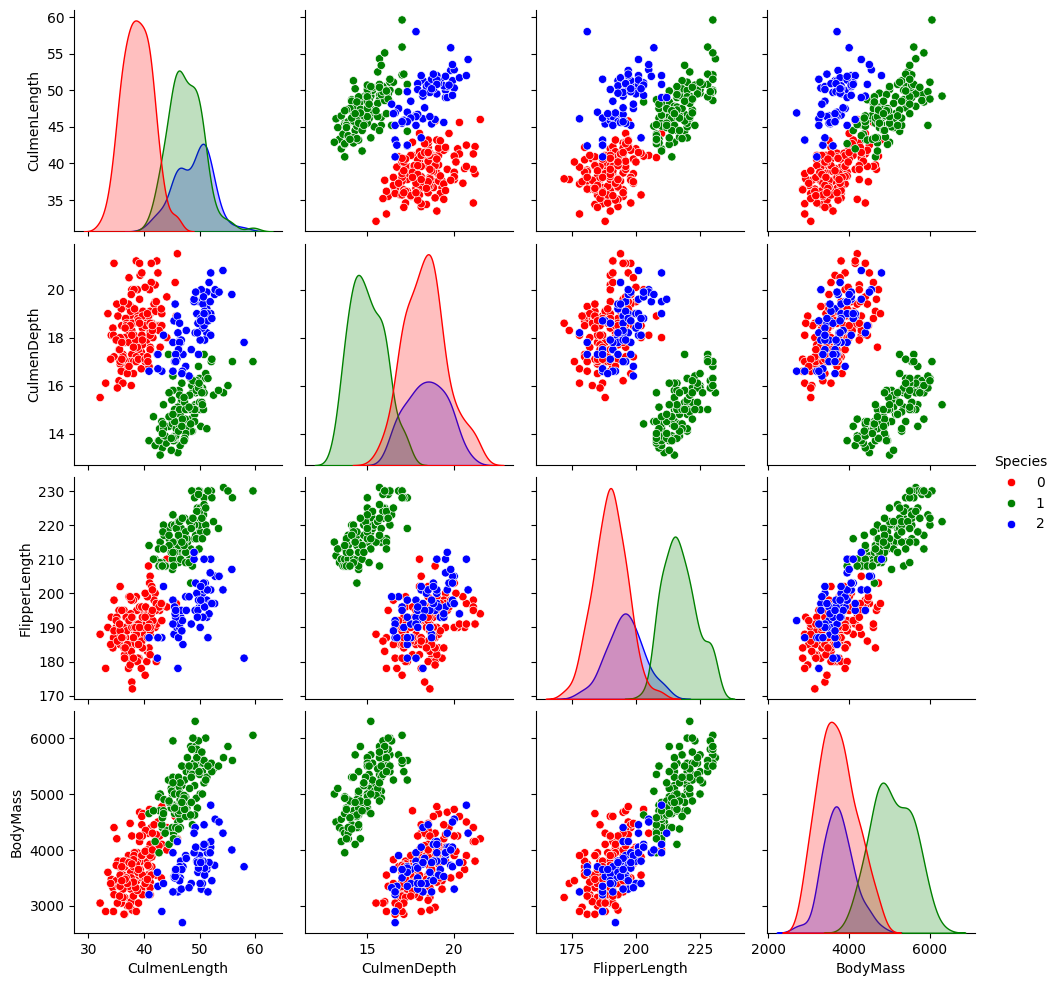

In [31]:
sns.pairplot(penguin,
             hue='Species',
             palette={0: 'red', 1: 'green', 2: 'blue'})
plt.show()

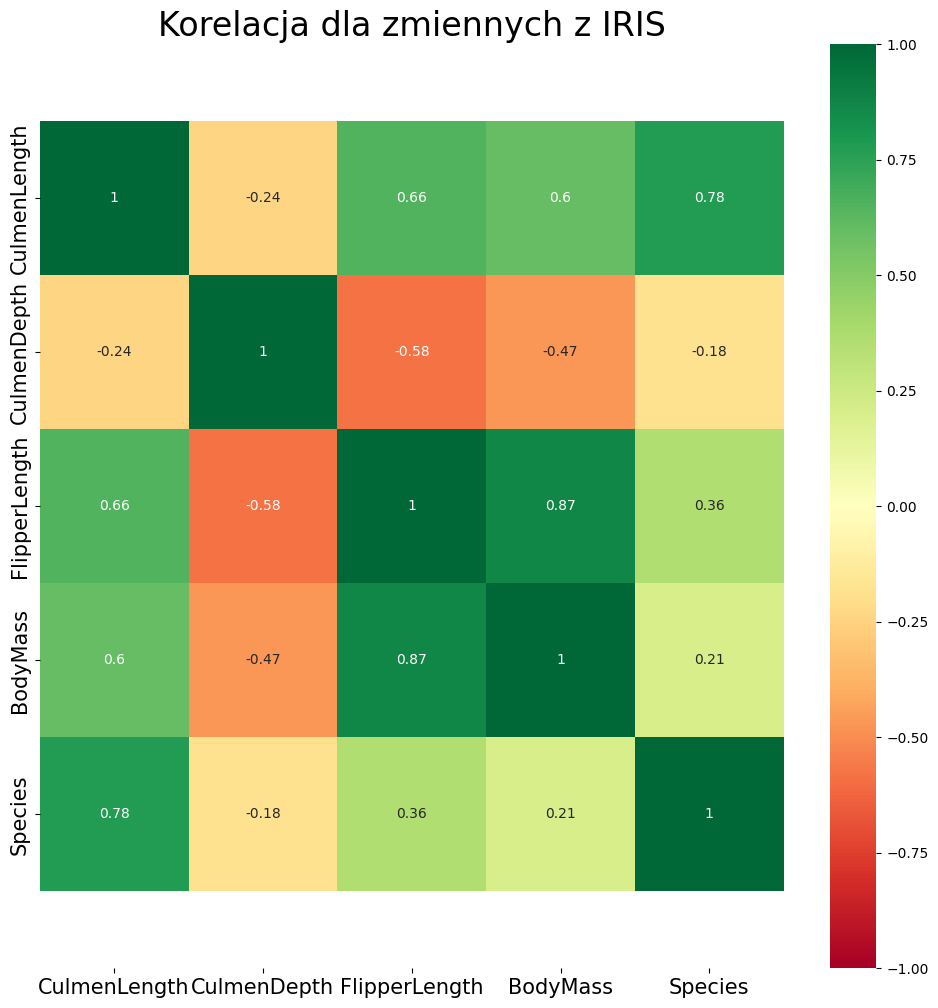

In [32]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(penguin.corr(),
                 xticklabels=penguin.corr().columns,
                 yticklabels=penguin.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True,
                 vmin=-1,
                 vmax= 1)

plt.title('Korelacja dla zmiennych z IRIS', fontsize=24)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = penguin.drop('Species', axis=1).copy()
y = penguin['Species'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaler)
train_penguin = pd.DataFrame(np.concatenate([X_train_pca,
                          np.array(y_train).reshape(-1, 1)],
                          axis=1))
train_penguin.rename(columns = {0: 'PC1', 1: 'PC2',
                             2: 'PC3', 3: 'PC4', 4: 'Species'},
                  inplace=True)
train_penguin[['PC1', 'PC2','PC3','PC4']] = train_penguin[['PC1', 'PC2','PC3', 'PC4']].astype(float)
train_penguin.corr()

,PC1,PC2,PC3,PC4,Species
PC1,1.000000e+00,4.973308e-17,2.509932e-16,-6.186377e-18,0.426933
PC2,4.973308e-17,1.000000e+00,-3.172435e-17,-1.113583e-16,0.365677
PC3,2.509932e-16,-3.172435e-17,1.000000e+00,2.027349e-16,0.626119
PC4,-6.186377e-18,-1.113583e-16,2.027349e-16,1.000000e+00,-0.028837
Species,4.269326e-01,3.656773e-01,6.261193e-01,-2.883655e-02,1.000000


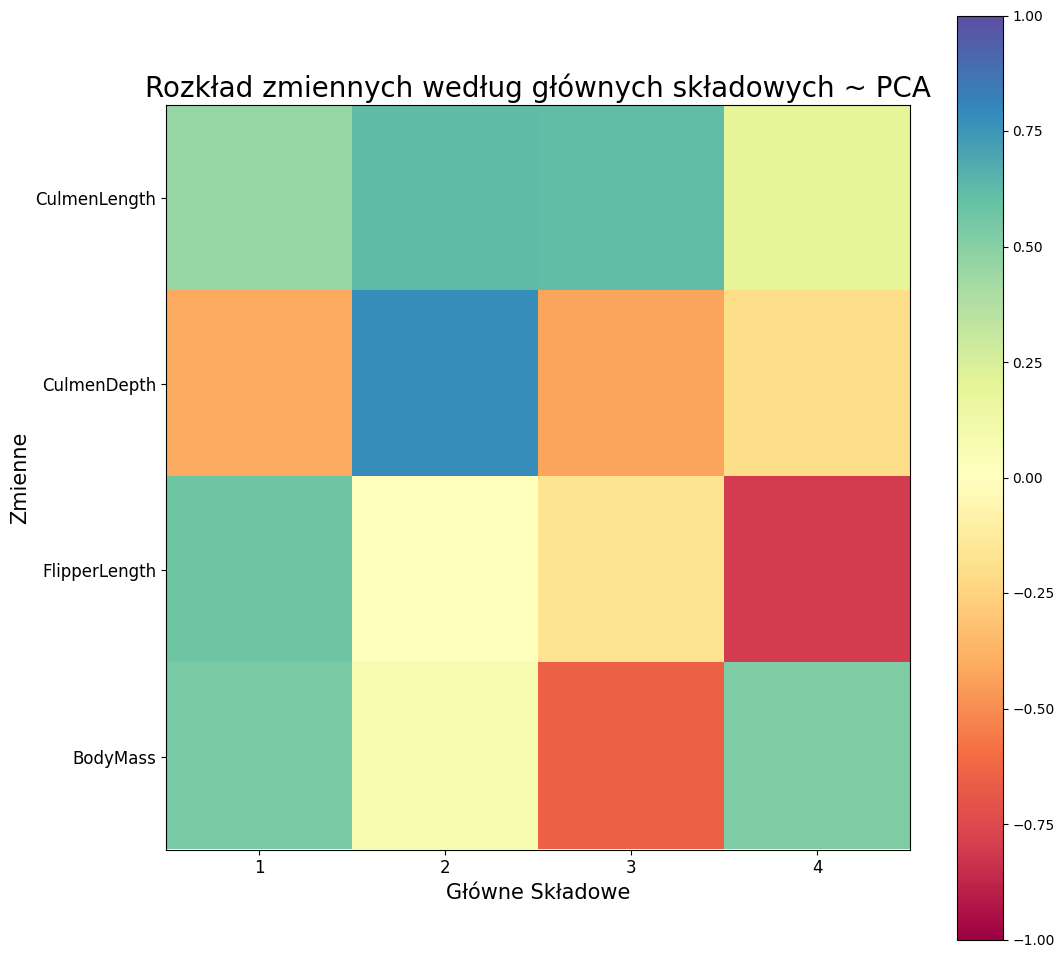

In [34]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(pca.components_.T, cmap = 'Spectral', vmin =-1, vmax = 1)
plt.yticks(range(len(X_train.columns)), X_train.columns, fontsize=12)
plt.xticks(range(4), range(1, 5), fontsize=12)
plt.xlabel('Główne Składowe', fontsize=15)
plt.ylabel('Zmienne', fontsize=15)
plt.title('Rozkład zmiennych według głównych składowych ~ PCA', fontsize=20)
plt.colorbar()
plt.show()

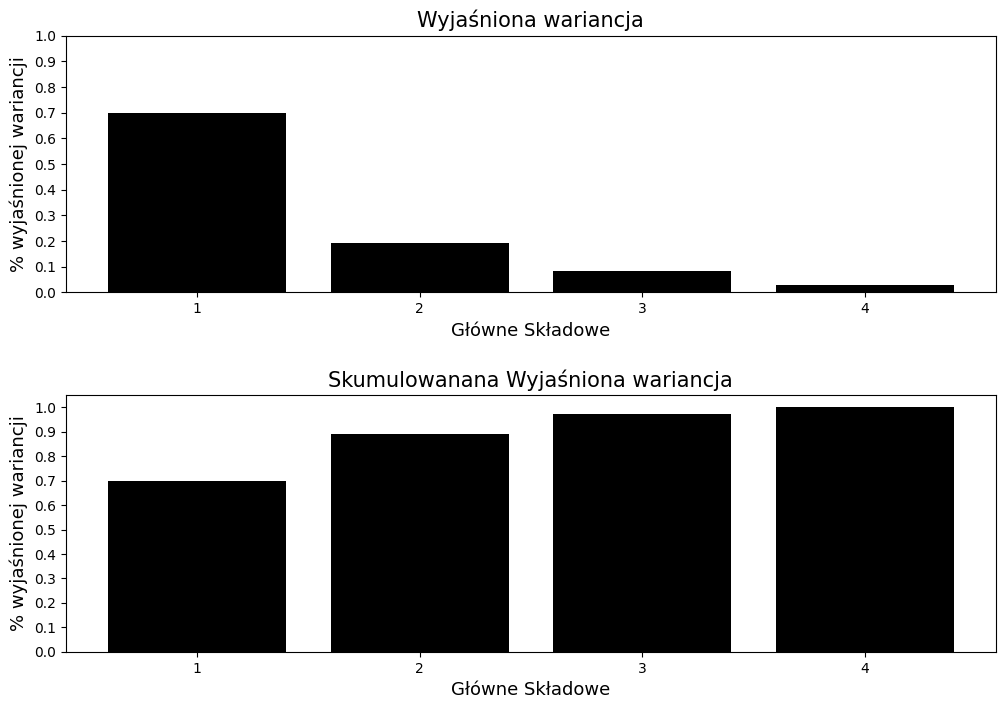

Główna składowa: 1, Wyjaśniona wariancja: 0.69963, Skumulowana Wyjaśniona wariancja: 0.69963
Główna składowa: 2, Wyjaśniona wariancja: 0.19098, Skumulowana Wyjaśniona wariancja: 0.89061
Główna składowa: 3, Wyjaśniona wariancja: 0.08227, Skumulowana Wyjaśniona wariancja: 0.97288
Główna składowa: 4, Wyjaśniona wariancja: 0.02712, Skumulowana Wyjaśniona wariancja: 1.0


In [35]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Skumulowanana Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Główna składowa: {principal_component}, Wyjaśniona wariancja: {np.round(explained_var, 5)}, Skumulowana Wyjaśniona wariancja: {np.round(cum_explained_var, 5)}')
    principal_component += 1

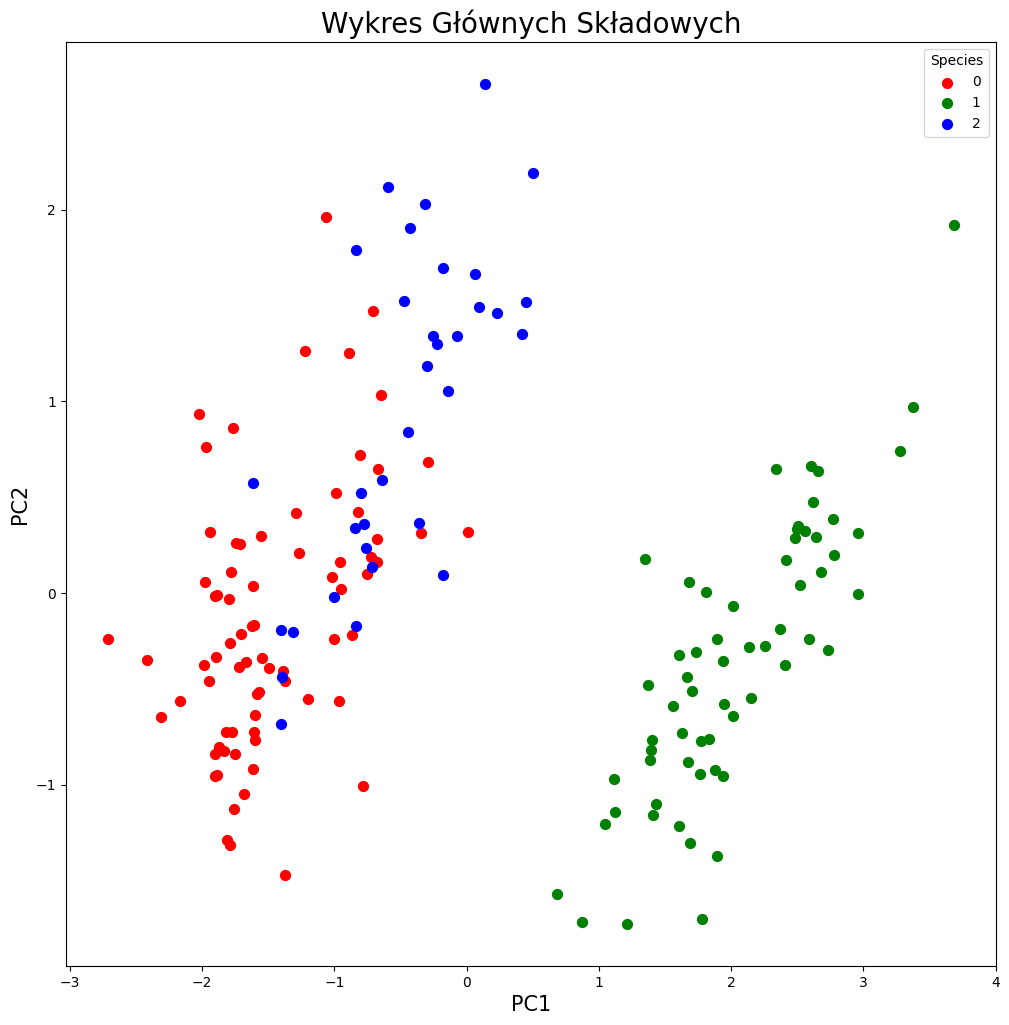

In [36]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(x=train_penguin.loc[train_penguin['Species']== 0, 'PC1'],
            y=train_penguin.loc[train_penguin['Species']== 0,'PC2'],
            c='red', label='0', s=50)
plt.scatter(x=train_penguin.loc[train_penguin['Species']== 1, 'PC1'],
            y=train_penguin.loc[train_penguin['Species']== 1,'PC2'],
            c='green', label='1', s=50)
plt.scatter(x=train_penguin.loc[train_penguin['Species']== 2, 'PC1'],
            y=train_penguin.loc[train_penguin['Species']== 2,'PC2'],
            c='blue', label='2', s=50)
plt.xlabel(xlabel='PC1', size=15)
plt.ylabel(ylabel='PC2', size=15)
plt.title('Wykres Głównych Składowych', size=20)
plt.legend(title='Species')
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate
import datetime

X_test_scaler = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

def train_and_check(Xtrain, Xtest, ytrain, ytest):
    classifier = LogisticRegression(max_iter=100000)
    start = datetime.datetime.now()
    classifier.fit(Xtrain, ytrain)
    end = datetime.datetime.now()
    time = (end - start).microseconds
    evaluation = np.round(classifier.score(Xtest, ytest), 4)
    return evaluation, time

results = []

not_scaled_data = train_and_check(X_train, X_test, y_train, y_test)
results.append(['Nieskalowane dane', not_scaled_data[0], not_scaled_data[1]])

scaled_data = train_and_check(X_train_scaler, X_test_scaler, y_train, y_test)
results.append(['Skalowane dane', scaled_data[0], scaled_data[1]])

PC4_data = train_and_check(X_train_pca, X_test_pca, y_train, y_test)
results.append(['4 PC', PC4_data[0], PC4_data[1]])

PC3_data = train_and_check(X_train_pca[:, :3], X_test_pca[:, :3], y_train, y_test)
results.append(['3 PC', PC3_data[0], PC3_data[1]])

PC2_data = train_and_check(X_train_pca[:, :2], X_test_pca[:, :2], y_train, y_test)
results.append(['2 PC', PC2_data[0], PC2_data[1]])

PC1_data = train_and_check(X_train_pca[:, :1], X_test_pca[:, :1], y_train, y_test)
results.append(['1 PC', PC1_data[0], PC1_data[1]])

df = pd.DataFrame(results, columns=['Model', 'Dokładność', 'Czas trenowania (microseconds)'])

print(tabulate(df, headers='keys', tablefmt='pretty'))

+---+-------------------+------------+--------------------------------+
|   |       Model       | Dokładność | Czas trenowania (microseconds) |
+---+-------------------+------------+--------------------------------+
| 0 | Nieskalowane dane |   0.9942   |             168000             |
| 1 |  Skalowane dane   |    1.0     |              1000              |
| 2 |       4 PC        |    1.0     |              1001              |
| 3 |       3 PC        |   0.9942   |              1000              |
| 4 |       2 PC        |   0.9181   |              2000              |
| 5 |       1 PC        |   0.9298   |              2000              |
+---+-------------------+------------+--------------------------------+


In [ ]:
Na 3 głównych składowych można by zbudować o 1% lepszy model niz ostatnio, natomiast 4 składowa nic nie wnosi. Dokładność trzech i czterech składowych jest taka sama.